In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator (rescale=1./255, 
                                     shear_range=0.2,zoom_range=0.2, 
                                     horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
x_train = train_datagen.flow_from_directory(r'C:\Users\Sneha\Desktop\dataset\test',target_size=(64, 64), 
                                            batch_size=32, 
                                            color_mode='grayscale',
                                            class_mode='categorical')
x_test = test_datagen.flow_from_directory(r'C:\Users\Sneha\Desktop\dataset\train',
                                          target_size=(64, 64), batch_size=32, 
                                          color_mode='grayscale', 
                                          class_mode='categorical')

Found 30 images belonging to 6 classes.
Found 594 images belonging to 6 classes.


# Importing The Model Building Libraries

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [5]:
print(x_train.class_indices) 

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


# Initializing The Model


In [6]:
model=Sequential()

# Adding CNN Layers


In [7]:
# First convolution Layer and pooling
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution Layer and pooling
model.add(Conv2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the layers
model.add(Flatten())

# Adding Dense Layers

In [8]:
model.add(Dense (units=128, activation='relu')) 
model.add(Dense (units=6, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# Configure The Learning Process

In [10]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train The Model

In [11]:
model.fit_generator(x_train, 
                    steps_per_epoch = len(x_train),
                    epochs=25, 
                    validation_data=x_test, 
                    validation_steps = len(x_test))

Epoch 1/25


C:\Users\Sneha\AppData\Local\Temp\ipykernel_23416\1576959243.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,


1/1 [==============================] - 2s 2s/step - loss: 1.8108 - accuracy: 0.1000 - val_loss: 1.8128 - val_accuracy: 0.1667
Epoch 2/25
1/1 [==============================] - 1s 543ms/step - loss: 1.7759 - accuracy: 0.1667 - val_loss: 1.7742 - val_accuracy: 0.2542
Epoch 3/25
1/1 [==============================] - 1s 573ms/step - loss: 1.7316 - accuracy: 0.4000 - val_loss: 1.7679 - val_accuracy: 0.1919
Epoch 4/25
1/1 [==============================] - 1s 596ms/step - loss: 1.6833 - accuracy: 0.3000 - val_loss: 1.7178 - val_accuracy: 0.3199
Epoch 5/25
1/1 [==============================] - 1s 584ms/step - loss: 1.5907 - accuracy: 0.6000 - val_loss: 1.6923 - val_accuracy: 0.3367
Epoch 6/25
1/1 [==============================] - 0s 469ms/step - loss: 1.4695 - accuracy: 0.8333 - val_loss: 1.6693 - val_accuracy: 0.2997
Epoch 7/25
1/1 [==============================] - 0s 456ms/step - loss: 1.4542 - accuracy: 0.6667 - val_loss: 1.6376 - val_accuracy: 0.3889
Epoch 8/25
1/1 [==================

# Save The Model

In [12]:
model.save('gesture.h5')

In [13]:
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)

# Test The Model


In [14]:
from tensorflow.keras.models import load_model 
from keras.preprocessing import image 
model= load_model("gesture.h5") #Loading the model for testing =

In [15]:
import tensorflow as tf
import numpy as np  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("Gesture.h5")
path= r"C:\Users\Sneha\Desktop\dataset\test\2\3.jpg"

Populating the interactive namespace from numpy and matplotlib


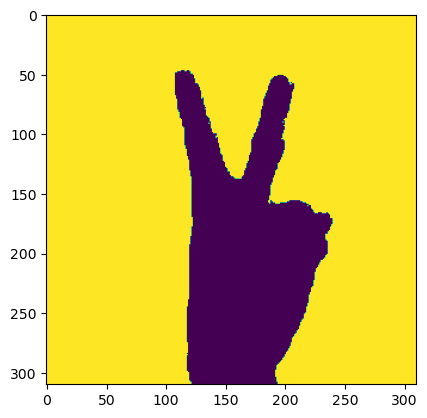

In [16]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(path)
imgplot = plt.imshow(imgs)
plt.show()

In [17]:
img = image.load_img(path,
                     color_mode='grayscale',
                     target_size= (64,64))
x = image.img_to_array(img)#image to array
x.shape

(64, 64, 1)

In [18]:
type(x)

numpy.ndarray

In [19]:
x = np.expand_dims(x,axis=0)

In [20]:
x.shape

(1, 64, 64, 1)

In [21]:
pred=(model.predict(x) > 0.5).astype("int64")
pred

1/1 [==============================] - 0s 79ms/step


array([[0, 0, 1, 0, 0, 0]], dtype=int64)

In [22]:
index=['0', '1', '2', '3', '4', '5']

In [23]:
index[np.argmax(pred[0])]

'2'

In [24]:
import numpy as np
p=[]
for i in range(0,6):
    for j in range(0,5):
        path= r"C:\\Users\\Sneha\\Desktop\\dataset\\test\\"+str(i)+"\\"+str(j)+".jpg"
        img = image.load_img(path,color_mode="grayscale",target_size=(64,64))
        x = image.img_to_array(img)#image to array
        x = np.expand_dims (x,axis = 0) #changing the shape
        pred = np.argmax(model.predict(x), axis=-1) #predicting the classes
        p.append(pred)
print(p)

1/1 [==============================] - 0s 16ms/step
[array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([2], dtype=int64), array([2], dtype=int64), array([2], dtype=int64), array([2], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([4], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64), array([5], dtype=int64)]


In [25]:
result=[]
index=['0','1','2','3','4','5']
for i in p:
    result.append(index[i[0]])
    
print(result)

['0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5']
